In [1]:
pip install roboflow ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="snDkU8oD0482mdPZtkVJ")
project = rf.workspace("pro-6ndko").project("detecting-food-c9guk")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [4]:
# Step 2: Verify dataset structure
dataset_path = dataset.location  # Get the dataset location
data_yaml_path = dataset_path + "/data.yaml"  # Path to the data.yaml file

# Print dataset info
print(f"Dataset downloaded to: {dataset_path}")
print(f"Data configuration file: {data_yaml_path}")

Dataset downloaded to: c:\Users\samad\Coding\Tuwaiq\Computer Vision\cv-project-t4\detecting-food--2
Data configuration file: c:\Users\samad\Coding\Tuwaiq\Computer Vision\cv-project-t4\detecting-food--2/data.yaml


In [5]:
# Step 3: Train the YOLOv8 model
# Load the YOLOv8 model
# model = YOLO("yolo11n.pt")

# # Train the model
# model.train(
#     data=data_yaml_path,          # Path to the data.yaml file
#     epochs=100,                    # Number of training epochs
#     imgsz=640,                    # Image size (640x640)
#     batch=16,                     # Batch size (adjust based on your GPU memory)
#     name="yolov11_detect_ingredient",  # Name of the training run
#     project="runsnew/train",         # Directory for training runs
# )
# MAP50: 79

In [22]:
model = YOLO("bestV3.pt")

In [20]:
# Evaluate the model on the test set
metrics = model.val(data=data_yaml_path, split="test")

Ultralytics 8.3.51  Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8550U 1.80GHz)


val: Scanning C:\Users\samad\Coding\Tuwaiq\Computer Vision\cv-project-t4\detecting-food--2\test\labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 19, len(boxes) = 48. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.23s/it]


                   all         27         48      0.676      0.406      0.446      0.302
                 Beans          2          4      0.272        0.5      0.421      0.317
                 Bread          1          2          1      0.979      0.995      0.647
                Carrot          1          2          1      0.568      0.995      0.324
                Cheese          1          1      0.843          1      0.995      0.398
               Chicken          1          1      0.791          1      0.995      0.895
                  Corn          1          1      0.724          1      0.995      0.796
              Cucumber          2          3      0.643      0.667      0.626      0.365
                   Egg          2          4      0.764          1      0.895      0.754
                 Flour          1          1      0.799          1      0.995      0.895
           Green Apple          2          2          1          0      0.124     0.0491
                 Lemo

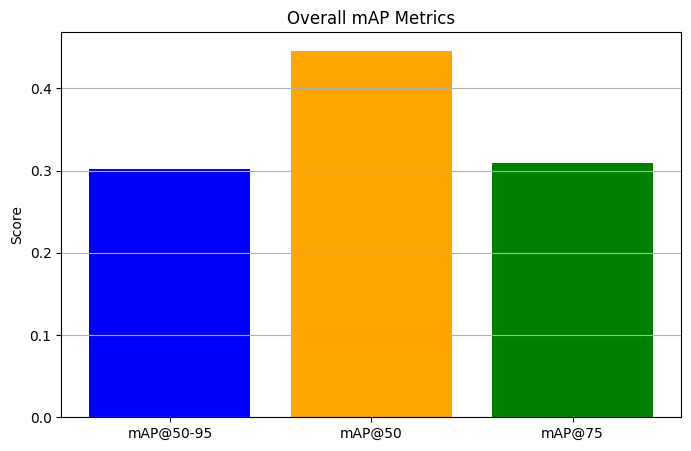

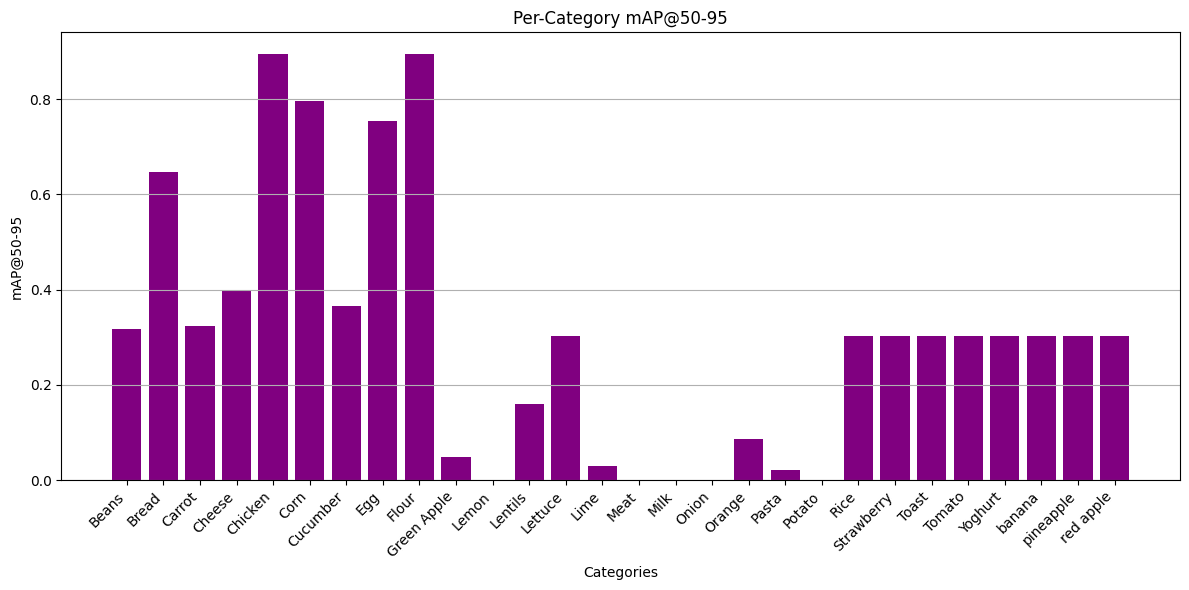

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Extract overall metrics
map50_95 = metrics.box.map  # Overall mAP 50-95
map50 = metrics.box.map50   # mAP at IoU 50
map75 = metrics.box.map75   # mAP at IoU 75
category_maps = metrics.box.maps  # List of mAP 50-95 for each category
class_names = metrics.names  # Dictionary mapping indices to class names

# Map class indices to names
class_labels = [class_names[i] for i in range(len(category_maps))]

# Overall mAP visualization
plt.figure(figsize=(8, 5))
plt.bar(['mAP@50-95', 'mAP@50', 'mAP@75'], [map50_95, map50, map75], color=['blue', 'orange', 'green'])
plt.title('Overall mAP Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Per-category mAP visualization
if category_maps.any():
    x_indices = np.arange(len(category_maps))
    
    plt.figure(figsize=(12, 6))
    plt.bar(x_indices, category_maps, color='purple')
    plt.title('Per-Category mAP@50-95')
    plt.xlabel('Categories')
    plt.ylabel('mAP@50-95')
    plt.xticks(x_indices, class_labels, rotation=45, ha="right")  # Label bars with class names
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()



In [23]:
results = model.predict('test_images\IMG_0344.JPEG')
for r in results:
    r.show()

invalid escape sequence '\I'
invalid escape sequence '\I'
invalid escape sequence '\I'


image 1/1 c:\Users\samad\Coding\Tuwaiq\Computer Vision\cv-project-t4\test_images\IMG_0344.JPEG: 640x640 (no detections), 229.9ms
Speed: 14.9ms preprocess, 229.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
